<a href="https://colab.research.google.com/github/LeoVogiatzis/medical_data_analysis/blob/main/Interpretable_ml_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import classification_report, precision_recall_curve, f1_score, auc, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
from numpy import loadtxt
from xgboost import XGBClassifier

import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install eli5

import warnings
warnings.simplefilter('ignore')
import os#Walking through directores

import plotly.graph_objects as go # Generate Graphs
from plotly.subplots import make_subplots #To Create Subplots
pd.set_option('display.max_columns', None)#Setting Max Columns Display to Max inorder to get glance of all features in dataframe

In [ ]:
  %%capture
!pip install orange3
!pip install shap
!pip install pdpbox

In [ ]:
!pip install lime

In [ ]:
data = pd.read_csv('/content/cleaned_cardio_train.csv')


In [ ]:
data.columns

Index(['Unnamed: 0', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi',
       'pulse'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0', 'bmi'], axis=1, inplace=True)

In [ ]:
# data.drop(columns=['height', 'bmi'], axis=True, inplace=True)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('cardio', axis=1),
                                                        data['cardio'], test_size=0.2)

In [ ]:
x_train.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'pulse'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
!pip install https://github.com/adebayoj/fairml/archive/master.zip


In [ ]:

import os
import numpy as np 
import pandas as pd 
import xgboost as xgb
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from pdpbox import pdp, get_dataset, info_plots
import eli5
from eli5.sklearn import PermutationImportance
import shap
import lime
from lime import lime_tabular
from lime import submodular_pick
from fairml import audit_model
from fairml import plot_dependencies
# from utils import clf_metrics

%matplotlib inline

In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print("Random Forests Performance:")
print(accuracy_score(y_test,y_pred))

Random Forests Performance:
0.6834532374100719


In [ ]:
## Model training (Train Dataset in DataFrame format)
clf_xgb_df = XGBClassifier(objective = 'binary:logistic', n_estimators= 4, max_depth= 4, 
                              learning_rate= 0.05, seed = 1984)

clf_xgb_df.fit(x_train, y_train, eval_metric="auc", verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=4, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1984,
              silent=None, subsample=1, verbosity=1)

In [ ]:
## Predictions
y_pred_train = clf_xgb_df.predict(x_train)
y_proba_train = clf_xgb_df.predict_proba(x_train)[:, 1]
y_pred_test = clf_xgb_df.predict(x_test)
y_proba_test = clf_xgb_df.predict_proba(x_test)[:, 1]

In [ ]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'pulse'],
      dtype='object')

In [ ]:
columns_ = data.iloc[:, 3:12].columns

In [ ]:
train = data.drop('cardio', axis=1)

In [ ]:
x_train

array([[0.45714286, 1.        , 0.42339334, ..., 0.        , 1.        ,
        0.25      ],
       [0.48571429, 0.        , 0.34866062, ..., 0.        , 1.        ,
        0.375     ],
       [0.91428571, 0.        , 0.46571131, ..., 0.        , 1.        ,
        0.525     ],
       ...,
       [0.65714286, 0.        , 0.33302573, ..., 0.        , 1.        ,
        0.3125    ],
       [0.57142857, 0.        , 0.59517477, ..., 1.        , 0.        ,
        0.1875    ],
       [0.94285714, 1.        , 0.59517477, ..., 1.        , 1.        ,
        0.375     ]])

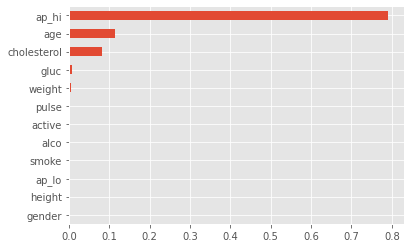

In [ ]:
feat_importances = pd.Series(clf_xgb_df.feature_importances_, index = x_train.columns).sort_values(ascending=True)
feat_importances.tail(20).plot(kind='barh')

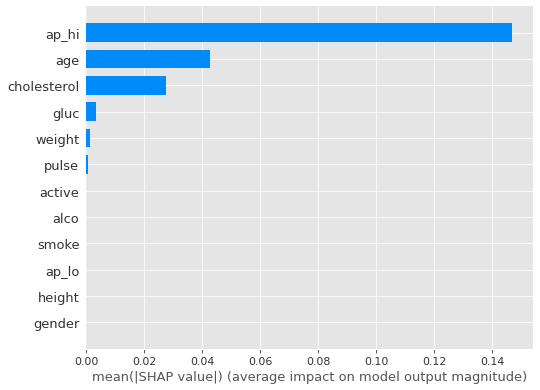

In [ ]:
explainer = shap.TreeExplainer(clf_xgb_df)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, plot_type = 'bar')

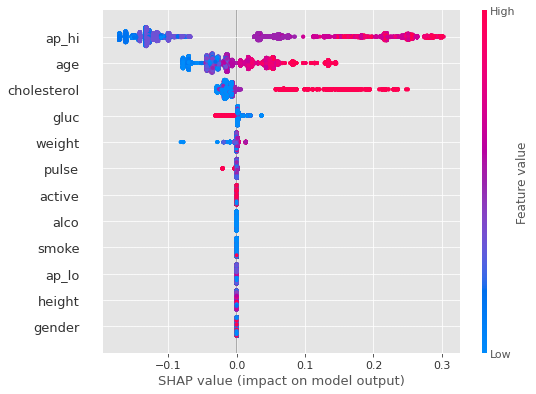

In [ ]:
shap.summary_plot(shap_values, x_test)


In [ ]:
# Train
perm = PermutationImportance(clf_xgb_df, scoring = 'roc_auc', random_state=1984).fit(x_train, y_train)
eli5.show_weights(perm, feature_names = x_train.columns.tolist())

Weight,Feature
0.2144 ± 0.0014,ap_hi
0.0448 ± 0.0013,age
0.0324 ± 0.0031,cholesterol
0.0015 ± 0.0002,gluc
0.0005 ± 0.0001,weight
0.0001 ± 0.0001,pulse
0 ± 0.0000,active
0 ± 0.0000,alco
0 ± 0.0000,smoke
0 ± 0.0000,ap_lo


In [ ]:
# Test
perm = PermutationImportance(clf_xgb_df, scoring = 'roc_auc', random_state=1984).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.2123 ± 0.0131,ap_hi
0.0401 ± 0.0051,age
0.0313 ± 0.0043,cholesterol
0.0013 ± 0.0002,gluc
0.0003 ± 0.0004,weight
0.0000 ± 0.0003,pulse
0 ± 0.0000,active
0 ± 0.0000,alco
0 ± 0.0000,smoke
0 ± 0.0000,ap_lo


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


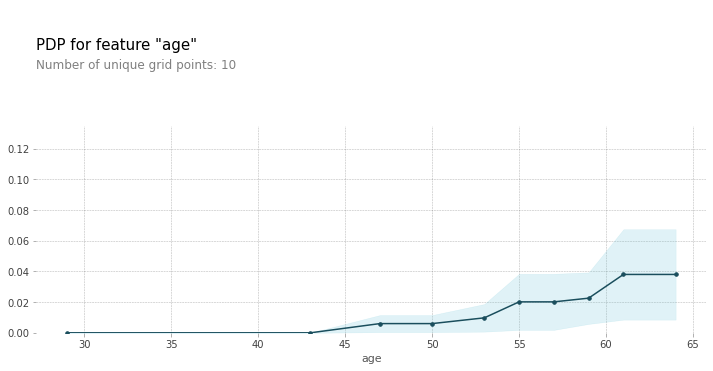

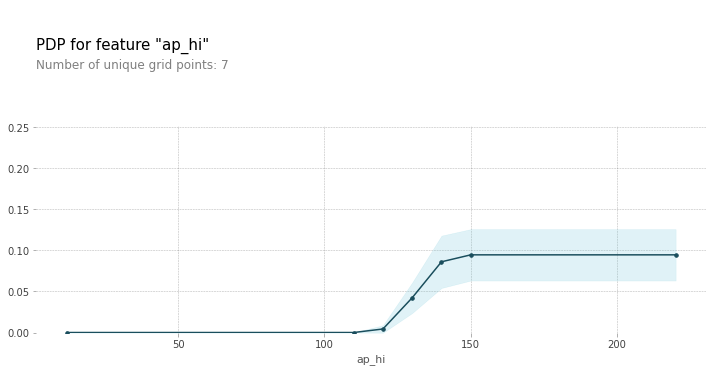

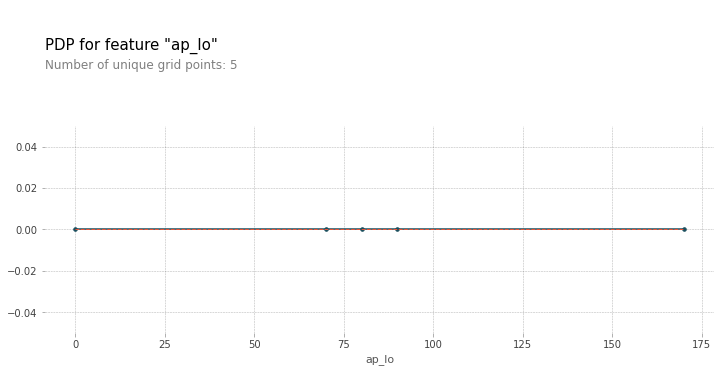

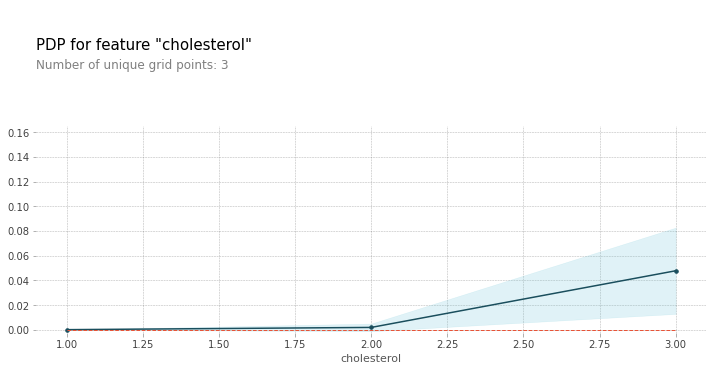

In [ ]:

# Create the data that we will plot
pdp_married = pdp.pdp_isolate(model=clf_xgb_df, dataset=x_test, model_features=x_test.columns, feature='age')
pdp_capital = pdp.pdp_isolate(model=clf_xgb_df, dataset=x_test, model_features=x_test.columns, feature='ap_hi')
pdp_education = pdp.pdp_isolate(model=clf_xgb_df, dataset=x_test, model_features=x_test.columns, feature='ap_lo')
pdp_age = pdp.pdp_isolate(model=clf_xgb_df, dataset=x_test, model_features=x_test.columns, feature='cholesterol')

# Plot it
pdp.pdp_plot(pdp_married, 'age', figsize=(12, 6))
pdp.pdp_plot(pdp_capital, 'ap_hi', figsize=(12, 6))
pdp.pdp_plot(pdp_education, 'ap_lo',figsize=(12, 6))
pdp.pdp_plot(pdp_age, 'cholesterol', figsize=(12, 6))
plt.show()

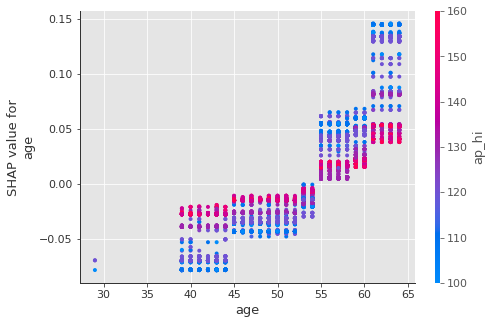

In [ ]:
shap.dependence_plot('age', shap_values, x_test)


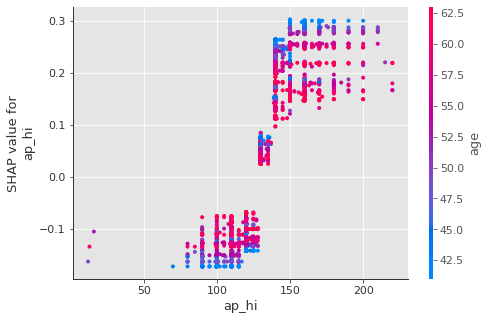

In [ ]:
shap.dependence_plot('ap_hi', shap_values, x_test)


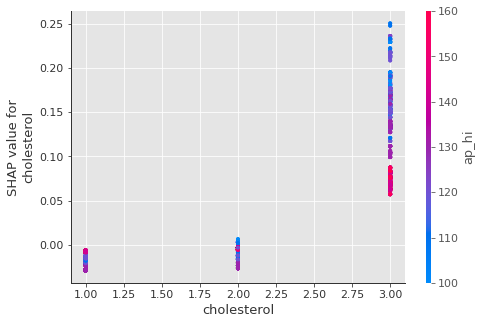

In [ ]:
shap.dependence_plot('cholesterol', shap_values, x_test)


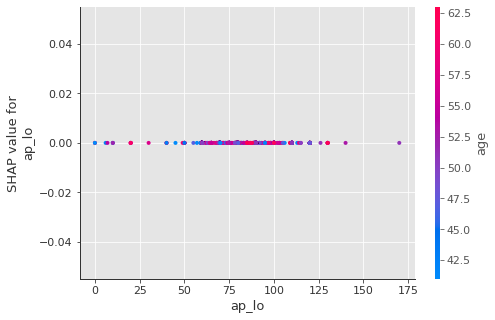

In [ ]:
shap.dependence_plot('ap_lo', shap_values, x_test)


Global Surrogate Model

In [ ]:
log_clf = LogisticRegression().fit(x_train, y_train)


In [ ]:

## Predictions
y_pred_train_log = log_clf.predict(x_train)
y_proba_train_log = log_clf.predict_proba(x_train)[:, 1]
y_pred_test_log = log_clf.predict(x_test)
y_proba_test_log = log_clf.predict_proba(x_test)[:, 1]

In [ ]:

print('R-squared Train RL-XGB: ', r2_score(y_proba_train_log, y_proba_train))
print('R-squared Test RL-XGB: ', r2_score(y_proba_test_log, y_proba_test))

R-squared Train RL-XGB:  0.31713643770449884
R-squared Test RL-XGB:  0.3173634857192259


In [ ]:

tree_clf = tree.DecisionTreeClassifier(random_state=0, max_depth=4).fit(x_train, y_train)

In [ ]:
y_pred_train_tr = tree_clf.predict(x_train)
y_proba_train_tr = tree_clf.predict_proba(x_train)[:, 1]
y_pred_test_tr = tree_clf.predict(x_test)
y_proba_test_tr = tree_clf.predict_proba(x_test)[:, 1]

In [ ]:
## r2
print('R-squared Train DT-XGB: ', r2_score(y_proba_train_tr, y_proba_train))
print('R-squared Test DT-XGB: ', r2_score(y_proba_test_tr, y_proba_test))


R-squared Train DT-XGB:  0.3319724739296841
R-squared Test DT-XGB:  0.3323806759793222


In [ ]:
new_x_train = x_train
new_y_train = clf_xgb_df.predict(x_train)

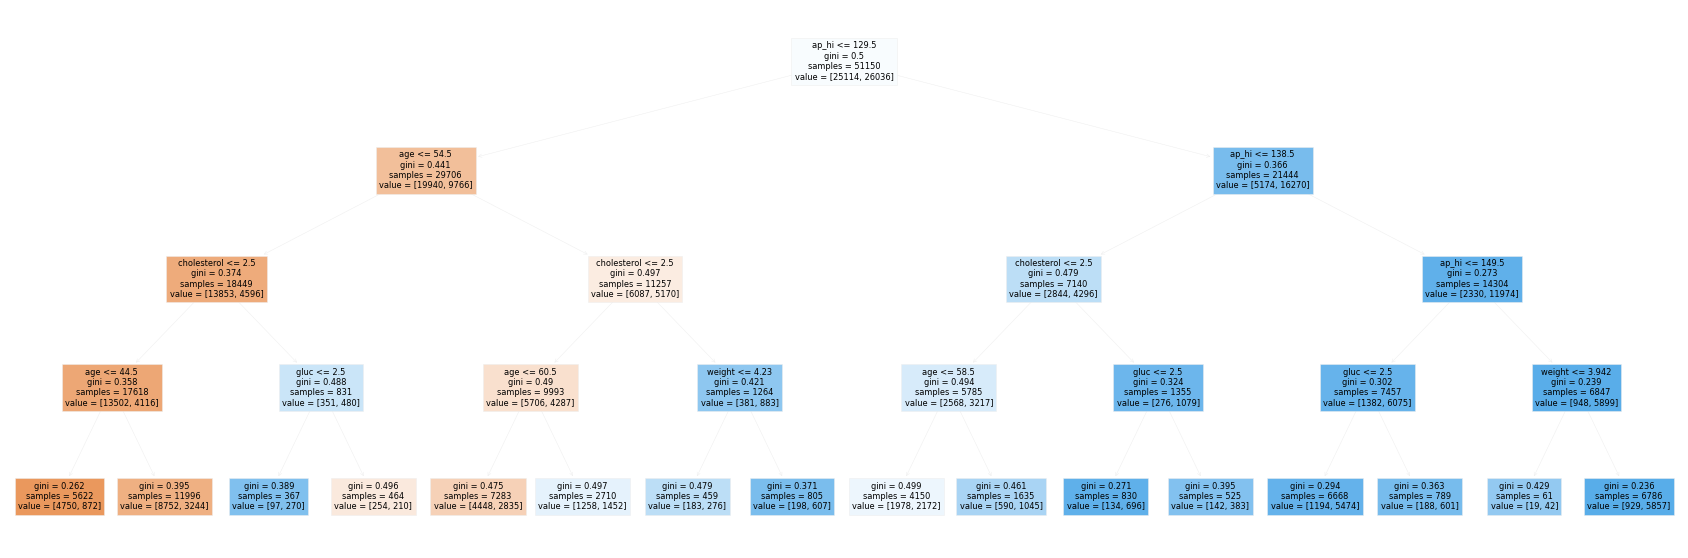

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10)) 
tree.plot_tree(tree_clf, feature_names= x_train.columns.to_list(), ax=ax, filled=True)
plt.show()

Locan Interpretabillitry

In [ ]:

explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, mode='classification',
                                                   feature_names=x_train.columns.tolist(),
                                                   discretize_continuous=False, random_state=1984)

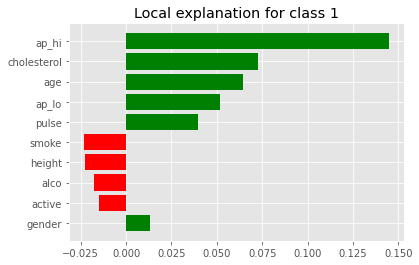

In [ ]:

# Generate an explanation
i = 546
exp = explainer.explain_instance(x_test.values[i], log_clf.predict_proba)

%matplotlib inline
fig = exp.as_pyplot_figure();

In [ ]:
sp_obj = submodular_pick.SubmodularPick(explainer, x_test.values, log_clf.predict_proba, 
                                        sample_size=3, num_exps_desired=3)

In [ ]:
[exp.show_in_notebook() for exp in sp_obj.sp_explanations]


Local Interpretabillity (SHAP)

In [ ]:
explainer = shap.TreeExplainer(clf_xgb_df, model_output='probability', feature_dependence='independent', data = x_test)

In [ ]:
row_to_show = 150
data_for_prediction = x_test.iloc[row_to_show, :]

shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

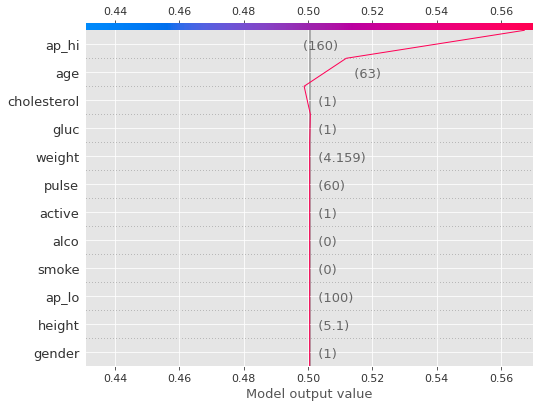

In [ ]:
shap.decision_plot(explainer.expected_value, shap_values, data_for_prediction)


In [ ]:
importances, _ = audit_model(log_clf.predict, x_train, distance_metric="mse")


In [ ]:

importances_dict={i:np.mean(np.array(f).astype(np.float)) for i,f in importances.items()}
pd.DataFrame(importances_dict, index=['Importance']).transpose().sort_values(by='Importance', ascending=False)

,Importance
pulse,0.205259
cholesterol,0.194761
ap_hi,0.191261
ap_lo,0.179277
age,0.169306
weight,0.154741
gender,0.134545
alco,-0.003558
smoke,-0.004536
active,-0.109482


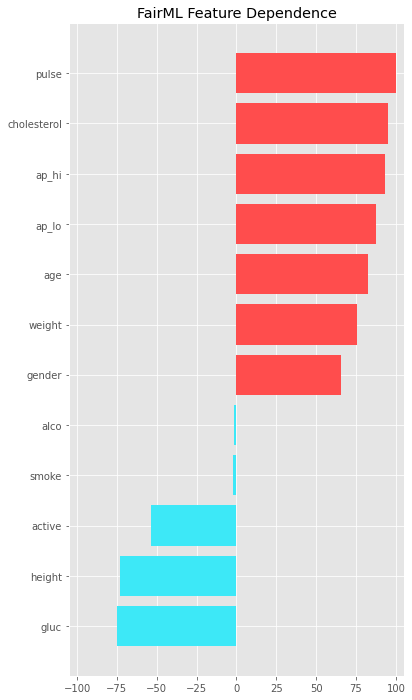

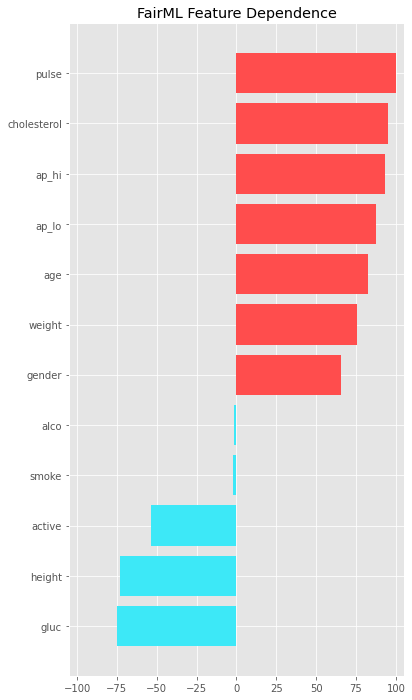

In [ ]:

plot_dependencies(
    importances.median(),
    reverse_values=False,
    title="FairML Feature Dependence",
    fig_size=(6,12)
)

Permutation importance by roc/auc

In [ ]:
# Test
perm = PermutationImportance(clf_xgb_df, scoring = 'roc_auc', random_state=1984).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = train.columns.tolist())


Weight,Feature
0.2196 ± 0.0064,ap_hi
0.0397 ± 0.0022,age
0.0316 ± 0.0026,cholesterol
0.0014 ± 0.0004,gluc
0.0006 ± 0.0005,pulse
0.0000 ± 0.0003,weight
0 ± 0.0000,active
0 ± 0.0000,alco
0 ± 0.0000,smoke
0 ± 0.0000,ap_lo


Partial dependency 

Computing partial dependence plots...


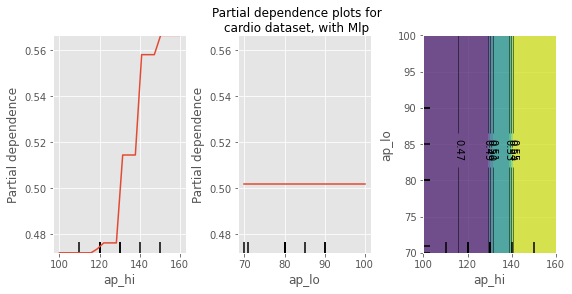

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
features = ['ap_hi', 'ap_lo', ('ap_hi', 'ap_lo')]
print('Computing partial dependence plots...')
#tic = time()
_, ax = plt.subplots(ncols=3, figsize=(9, 4))
display = plot_partial_dependence(
    clf_xgb_df, x_train, features, n_jobs=3, grid_resolution=20,
    ax=ax,
)
#print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    'Partial dependence plots for\n'
    'cardio dataset, with Mlp'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

In [ ]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'pulse'],
      dtype='object')

Rule Based Classifier

In [ ]:
import Orange
import Orange.evaluation.scoring
import Orange.classification.rules
import Orange.evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from ipywidgets import interactive
from IPython.display import display
target_names= list(data['cardio'].unique())
model = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=0)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_pred = model.predict(x_test)
feature_names = list(data.columns)
print("Simple Decision Tree Performance:")
print("Accuracy in Train Set",accuracy_score(y_train, y_train_pred))
print("Accuracy in Test Set",accuracy_score(y_test, y_pred))
learner = Orange.classification.rules.CN2Learner()
data = Orange.data.Table(x_train, y_train)
print("CN2 Ordered with Entropy Performance:")
def plot_rules(bw, mce, mrl):
    learner.rule_finder.quality_evaluator = Orange.classification.rules.EntropyEvaluator()
    learner.rule_finder.search_algorithm.beam_width = bw
    learner.rule_finder.general_validator.min_covered_examples = mce
    learner.rule_finder.general_validator.max_rule_length = mrl
    mymodel = learner.fit_storage(data)
    predicted = mymodel.predict(np.asarray(x_test))
    mypred = []
    for iii in predicted:
        if (iii[0] >= iii[1]):
            mypred.append(0)
        else:
            mypred.append(1)
    print(classification_report(y_test,y_pred,target_names=[str(i) for i in target_names]))
    model = learner(data)
    for rule in model.rule_list:
        rule = str(rule).replace("Class=v1", "cardio").replace("Class=v2", "non_cardio")
        for i in range(len(feature_names)-1,0,-1):
            num = ""
            if i<10:
                num = "0"+str(i)
            else:
                num = str(i)
            rule = rule.replace("Feature "+num, "("+ feature_names[i] + ")")
        print(rule)
    print()
    return learner

inter=interactive(plot_rules 
                ,bw = [3,5,8,10]
                ,mce = [7,9,11]
                ,mrl = [2,3,5,10])
display(inter)

Simple Decision Tree Performance:
Accuracy in Train Set 0.7082697947214076
Accuracy in Test Set 0.7111354394745073
CN2 Ordered with Entropy Performance:


Omitting domain in a call to Table(X, Y, metas), is deprecated and will be removed. Call Table.from_numpy(None, X, Y, metas) instead.


interactive(children=(Dropdown(description='bw', options=(3, 5, 8, 10), value=3), Dropdown(description='mce', …

In [ ]:
new_x_train = x_train
new_y_train = classifier.predict(x_train)

In [ ]:
# Generate explainer
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, mode='classification',feature_names=X_train.columns.tolist(), discretize_continuous=False, random_state=1984)
# Generate explanation for instance i
i = 546
exp = explainer.explain_instance(X_test.values[i], clf_xgb_array.predict_proba)
# Plot
fig = exp.as_pyplot_figure();